`Задание ПРО`\
`Основные цели этого задания:`

- Попрактиковаться в разработке алгоритмов на Python

- Углубиться в теорию линейной алгебры

`Задача:`

- Реализовать стохастический градиентный спуск для решения задачи линейной регрессии.

`Немного теории:`

Необходимость использовать итеративные методы в первую очередь появилась из-за высокой вычислительной сложности поиска решения прямым методом. Поиск обратной матрицы - это очень затратная операция, требующая порядка n4 действий. Однако при увеличении объемов данных для обучения начинает проявляться вычислительная неэффективность и традиционного градиентного спуска. При вычислении значения градиента в точке необходимо перемножать матрицы, и это - порядка n3 действий. В упражнениях из урока мы работали с небольшими данными, в которых было около 300 строк, однако на практике чаще встречаются датасеты с десятками и сотнями тысяч наблюдений. То есть количество операций при решении классическим градиентным спуском вырастет в миллион раз, хотя сами данные больше всего в 100 раз.

Самый простой способ оптимизировать градиентный спуск - искать направление спуска не по всем наблюдениям, а по какой-то их произвольной части. Если смотреть на 1% выборки на каждой итерации, то очередной расчет значения градиента будет в миллион раз “дешевле”!

Стохастический градиентный спуск более шумный, чем классический, поэтому шагов к итоговому решению может потребоваться больше. Но каждый из этих шагов на порядки дешевле, чем шаги классического градиентного спуска, поэтому итоговое время решения будет намного меньше. В статье есть картинки, которые визуализируют то, что у для стохастического градиентного спуска может понадобиться больше итераций. 

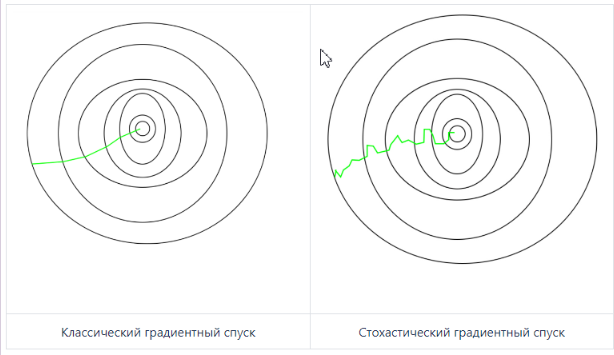


`Сформулируем итоговый алгоритм:`

- Определяются начальные значения весов модели.

- Данные перемешиваются случайным образом, чтобы никакие итерации не повторялись на одном сэмпле данных.

- Данные делятся на батчи (отдельные куски одинакового размера, который на порядок или несколько порядков меньше, чем количество наблюдений в исходных данных).

`В цикле по батчам:`

- Вычисляется градиент функции потерь

- Обновляются веса модели

Когда цикл по батчам закончился, считается, что закончилась одна эпоха.

Эпохи повторяются заранее заданное количество раз.

Обратите внимание, что `«итерация»` в алгоритме `классического` градиентного спуска и `«эпоха»` в алгоритме `стохастического` градиентного спуска - это `разные` `понятия`. Итерацией в алгоритме стохастического градиентного спуска также является однократное обновление вектора весов с помощью вычисления значения градиента.

`План решения:`

- Сгенерируйте синтетические данные для решения задачи регрессии. Для этого воспользуйтесь методом make_regression из модуля sklearn.datasets, указав, что число наблюдений должно равняться 100000.

- Доработайте класс MyLinearRegression из упражнений. Обновленный класс должен строить модель линейной регрессии с помощью классического метода градиентного спуска, если при инициализации не подается размер батча, а если размер батча подается, то решение должно вычисляться стохастическим методом градиентного спуска.

- Добавьте возможность подавать на вход размер батча. Проставьте дефолтным значением нового аргумента функции __init__ значение None.

- Случай классического градиентного спуска эквивалентен случаю, когда в стохастическом градиентном спуске размер батча совпадает с размером обучающего датасета, а число эпох - это просто число итераций. Поэтому для обобщения переименуйте параметр `iterations в параметр epochs` и проходитесь в цикле по нему.

- Внутри цикла реализуйте дополнительный цикл по батчам, внутри которого будете вычислять новое значение вектора весов, исключительно по значениям наблюдений конкретного батча. В случае классического градиентного спуска шаг в этом цикле будет только один, а батч будет всей обучающей выборкой.

- Не забудьте после очередной эпохи перемешать записи в данных. Обязательно перемешивайте их вместе с таргетом! Для этого можно воспользоваться функцией shuffle из модуля skearn.utils.

- Обучите свою модель линейной регрессии с помощью классического градиентного спуска с такими параметрами, чтобы получить значение ошибки MAE на валидационной части не больше 0.01. Замерьте время вычислений с помощью волшебной функции %%time. (Узнайте, какие еще есть удобные волшебные функции, запустив ячейку с командой %lsmagic!)

- Обучите свою модель линейной регрессии с помощью стохастического градиентного спуска с такими параметрами, чтобы получить значение ошибки MAE на валидационной части не больше, чем на предыдущем шаге, и убедитесь, что это заняло меньше времени. Помните, что в каждой эпохе будет много шагов со всеми батчами, поэтому число эпох должно быть на порядок ниже, чем число итераций у классического метода градиентного спуска.

- Проведите разные тесты (переберите разные размеры батчей и разные количества эпох) и `опишите ваши наблюдения в итоговом выводе`.